## PLAGIARISM DETECTION

In [54]:
# import libraries
import pandas as pd
import numpy as np
import os

In [2]:
csv_file = 'data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)

# print out the first few rows of data info
plagiarism_df.head(10)

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non
5,g0pB_taska.txt,a,non
6,g0pB_taskb.txt,b,non
7,g0pB_taskc.txt,c,cut
8,g0pB_taskd.txt,d,light
9,g0pB_taske.txt,e,heavy


### Types of Plagiarism

Each text file is associated with one Task (task A-E) and one Category of plagiarism, which you can see in the above DataFrame.

Five task types, A-E

- Each text file contains an answer to one short question; these questions are labeled as tasks A-E.

- Each task, A-E, is about a topic that might be included in the Computer Science curriculum that was created by the authors of this dataset. For example, Task A asks the question: "What is inheritance in object oriented programming?"

#### Four categories of plagiarism

- Each text file has an associated plagiarism label/category:

- cut: An answer is plagiarized; it is copy-pasted directly from the relevant Wikipedia source text.
light: An answer is plagiarized; it is based on the Wikipedia source text and includes some copying and paraphrasing.
- heavy: An answer is plagiarized; it is based on the Wikipedia source text but expressed using different words and structure. Since this doesn't copy directly from a source text, this will likely be the most challenging kind of plagiarism to detect.
- non: An answer is not plagiarized; the Wikipedia source text is not used to create this answer.
- orig: This is a specific category for the original, Wikipedia source text. We will use these files only for comparison purposes.
So, out of the submitted files, the only category that does not contain any plagiarism is non.

In the next cell, print out some statistics about the data.

In [3]:
# print out some stats about the data
print('Number of files: ', plagiarism_df.shape[0])  # .shape[0] gives the rows 
# .unique() gives unique items in a specified column
print('Number of unique tasks/question types (A-E): ', (len(plagiarism_df['Task'].unique())))
print('Unique plagiarism categories: ', (plagiarism_df['Category'].unique()))

Number of files:  100
Number of unique tasks/question types (A-E):  5
Unique plagiarism categories:  ['non' 'cut' 'light' 'heavy' 'orig']


You should see the number of text files in the dataset as well as some characteristics about the Task and Category columns. Note that the file count of 100 includes the 5 original wikipedia files for tasks A-E. If you take a look at the files in the data directory, you'll notice that the original, source texts start with the filename orig_ as opposed to g for "group."

So, in total there are 100 files, 95 of which are answers (submitted by people) and 5 of which are the original, Wikipedia source texts.

Your end goal will be to use this information to classify any given answer text into one of two categories, plagiarized or not-plagiarized.



## Distribution of Data

Next, let's look at the distribution of data. In this course, we've talked about traits like class imbalance that can inform how you develop an algorithm. So, here, we'll ask: How evenly is our data distributed among different tasks and plagiarism levels?

Below, you should notice two things:

Our dataset is quite small, especially with respect to examples of varying plagiarism levels.
The data is distributed fairly evenly across task and plagiarism types.

In [4]:
# Show counts by different tasks and amounts of plagiarism

# group and count by task
counts_per_task=plagiarism_df.groupby(['Task']).size().reset_index(name="Counts")
print("\nTask:")
display(counts_per_task)

# group by plagiarism level
counts_per_category=plagiarism_df.groupby(['Category']).size().reset_index(name="Counts")
print("\nPlagiarism Levels:")
display(counts_per_category)

# group by task AND plagiarism level
counts_task_and_plagiarism=plagiarism_df.groupby(['Task', 'Category']).size().reset_index(name="Counts")
print("\nTask & Plagiarism Level Combos :")
display(counts_task_and_plagiarism)


Task:


,Task,Counts
0,a,20
1,b,20
2,c,20
3,d,20
4,e,20



Plagiarism Levels:


,Category,Counts
0,cut,19
1,heavy,19
2,light,19
3,non,38
4,orig,5



Task & Plagiarism Level Combos :


,Task,Category,Counts
0,a,cut,4
1,a,heavy,3
2,a,light,3
3,a,non,9
4,a,orig,1
5,b,cut,3
6,b,heavy,4
7,b,light,3
8,b,non,9
9,b,orig,1


<BarContainer object of 25 artists>

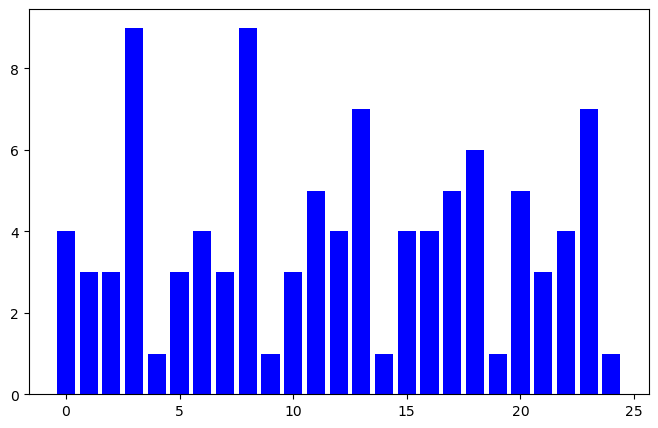

In [6]:
import matplotlib.pyplot as plt
# % matplotlib inline

# counts
group = ['Task', 'Category']
counts = plagiarism_df.groupby(group).size().reset_index(name="Counts")

plt.figure(figsize=(8,5))
plt.bar(range(len(counts)), counts['Counts'], color = 'blue')

## Plagiarism Detection, Feature Engineering

In this project, you will be tasked with building a plagiarism detector that examines an answer text file and performs binary classification; labeling that file as either plagiarized or not, depending on how similar that text file is to a provided, source text.

Your first task will be to create some features that can then be used to train a classification model. This task will be broken down into a few discrete steps:

Clean and pre-process the data.
Define features for comparing the similarity of an answer text and a source text, and extract similarity features.
Select "good" features, by analyzing the correlations between different features.
Create train/test .csv files that hold the relevant features and class labels for train/test data points.
In the next notebook, Notebook 3, you'll use the features and .csv files you create in this notebook to train a binary classification model in a SageMaker notebook instance.

You'll be defining a few different similarity features, as outlined in this paper, which should help you build a robust plagiarism detector!

To complete this notebook, you'll have to complete all given exercises and answer all the questions in this notebook.

All your tasks will be clearly labeled EXERCISE and questions as QUESTION.

It will be up to you to decide on the features to include in your final training and test data.

In [7]:
csv_file = 'data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)

# print out the first few rows of data info
plagiarism_df.head()

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non


In [8]:
csv_file = 'data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)
plagiarism_df

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non
...,...,...,...
95,orig_taska.txt,a,orig
96,orig_taskb.txt,b,orig
97,orig_taskc.txt,c,orig
98,orig_taskd.txt,d,orig


In [9]:
# Read in a csv file and return a transformed dataframe
def numerical_dataframe(csv_file='data/file_information.csv'):
    '''Reads in a csv file which is assumed to have `File`, `Category` and `Task` columns.
       This function does two things: 
       1) converts `Category` column values to numerical values 
       2) Adds a new, numerical `Class` label column.
       The `Class` column will label plagiarized answers as 1 and non-plagiarized as 0.
       Source texts have a special label, -1.
       :param csv_file: The directory for the file_information.csv file
       :return: A dataframe with numerical categories and a new `Class` label column'''
    
    # your code here
    plagiarism_df = pd.read_csv(csv_file)
    
    cat_to_class = {'non':0,
                   'heavy':1,
                   'light':2,
                   'cut':3,
                   'orig':-1}
    plagiarism_df["Category"]=plagiarism_df.Category.replace(cat_to_class)
    
    plagiarism_df["Class"] = plagiarism_df["Category"].apply(lambda x: 0 if x==0 else (-1 if x==-1 else 1))
    return plagiarism_df

In [10]:
# informal testing, print out the results of a called function
# create new `transformed_df`
transformed_df = numerical_dataframe(csv_file ='data/file_information.csv')

# check work
# check that all categories of plagiarism have a class label = 1
transformed_df.head(10)

,File,Task,Category,Class
0,g0pA_taska.txt,a,0,0
1,g0pA_taskb.txt,b,3,1
2,g0pA_taskc.txt,c,2,1
3,g0pA_taskd.txt,d,1,1
4,g0pA_taske.txt,e,0,0
5,g0pB_taska.txt,a,0,0
6,g0pB_taskb.txt,b,0,0
7,g0pB_taskc.txt,c,3,1
8,g0pB_taskd.txt,d,2,1
9,g0pB_taske.txt,e,1,1


In [25]:
# test cell that creates `transformed_df`, if tests are passed

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

# # importing tests
import problem_unittests as tests

# test numerical_dataframe function
tests.test_numerical_df(numerical_dataframe)

# if above test is passed, create NEW `transformed_df`
transformed_df = numerical_dataframe(csv_file ='data/file_information.csv')

# check work
print('\nExample data: ')
transformed_df.head()

Tests Passed!

Example data: 


,File,Task,Category,Class
0,g0pA_taska.txt,a,0,0
1,g0pA_taskb.txt,b,3,1
2,g0pA_taskc.txt,c,2,1
3,g0pA_taskd.txt,d,1,1
4,g0pA_taske.txt,e,0,0


### Text Processing & Splitting Data

Recall that the goal of this project is to build a plagiarism classifier. At it's heart, this task is a comparison text; one that looks at a given answer and a source text, compares them and predicts whether an answer has plagiarized from the source. To effectively do this comparison, and train a classifier we'll need to do a few more things: pre-process all of our text data and prepare the text files (in this case, the 95 answer files and 5 original source files) to be easily compared, and split our data into a train and test set that can be used to train a classifier and evaluate it, respectively.

To this end, you've been provided code that adds additional information to your transformed_df from above. The next two cells need not be changed; they add two additional columns to the transformed_df:

A Text column; this holds all the lowercase text for a File, with extraneous punctuation removed.
A Datatype column; this is a string value train, test, or orig that labels a data point as part of our train or test set
The details of how these additional columns are created can be found in the helpers.py file in the project directory. You're encouraged to read through that file to see exactly how text is processed and how data is split.

Run the cells below to get a complete_df that has all the information you need to proceed with plagiarism detection and feature engineering.

In [26]:
import helpers 

# create a text column 
text_df = helpers.create_text_column(transformed_df)
text_df.head()

,File,Task,Category,Class,Text
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...


In [27]:
# after running the cell above
# check out the processed text for a single file, by row index
row_idx = 0 # feel free to change this index

sample_text = text_df.iloc[0]['Text']

print('Sample processed text:\n\n', sample_text)

Sample processed text:

 inheritance is a basic concept of object oriented programming where the basic idea is to create new classes that add extra detail to existing classes this is done by allowing the new classes to reuse the methods and variables of the existing classes and new methods and classes are added to specialise the new class inheritance models the is kind of relationship between entities or objects  for example postgraduates and undergraduates are both kinds of student this kind of relationship can be visualised as a tree structure where student would be the more general root node and both postgraduate and undergraduate would be more specialised extensions of the student node or the child nodes  in this relationship student would be known as the superclass or parent class whereas  postgraduate would be known as the subclass or child class because the postgraduate class extends the student class  inheritance can occur on several layers where if visualised would display a l

### Split data into training and test sets

The next cell will add a Datatype column to a given DataFrame to indicate if the record is:

train - Training data, for model training.
test - Testing data, for model evaluation.
orig - The task's original answer from wikipedia.
Stratified sampling

The given code uses a helper function which you can view in the helpers.py file in the main project directory. This implements stratified random sampling to randomly split data by task & plagiarism amount. Stratified sampling ensures that we get training and test data that is fairly evenly distributed across task & plagiarism combinations. Approximately 26% of the data is held out for testing and 74% of the data is used for training.

The function train_test_dataframe takes in a DataFrame that it assumes has Task and Category columns, and, returns a modified frame that indicates which Datatype (train, test, or orig) a file falls into. This sampling will change slightly based on a passed in random_seed. Due to a small sample size, this stratified random sampling will provide more stable results for a binary plagiarism classifier. Stability here is smaller variance in the accuracy of classifier, given a random seed

In [28]:
random_seed = 1 # can change; set for reproducibility

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
import helpers

# create new df with Datatype (train, test, orig) column
# pass in `text_df` from above to create a complete dataframe, with all the information you need
complete_df = helpers.train_test_dataframe(text_df, random_seed=random_seed)

# check results
complete_df.head(10)

,File,Task,Category,Class,Text,Datatype
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...,train
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...,test
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...,train
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...,train
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...,train
5,g0pB_taska.txt,a,0,0,inheritance is a basic concept in object orien...,train
6,g0pB_taskb.txt,b,0,0,pagerank pr refers to both the concept and the...,train
7,g0pB_taskc.txt,c,3,1,vector space model is an algebraic model for r...,test
8,g0pB_taskd.txt,d,2,1,bayes theorem relates the conditional and marg...,train
9,g0pB_taske.txt,e,1,1,dynamic programming is a method for solving ma...,test


In [29]:
# Calculate the ngram containment for one answer file/source file pair in a df
from sklearn.feature_extraction.text import CountVectorizer
def calculate_containment(df, n, answer_filename):
    '''Calculates the containment between a given answer text and its associated source text.
       This function creates a count of ngrams (of a size, n) for each text file in our data.
       Then calculates the containment by finding the ngram count for a given answer text, 
       and its associated source text, and calculating the normalized intersection of those counts.
       :param df: A dataframe with columns,
           'File', 'Task', 'Category', 'Class', 'Text', and 'Datatype'
       :param n: An integer that defines the ngram size
       :param answer_filename: A filename for an answer text in the df, ex. 'g0pB_taskd.txt'
       :return: A single containment value that represents the similarity
           between an answer text and its source text.
    '''
    
    # your code here
    a_df = df[df["File"] == answer_filename]
    a_text = a_df["Text"].values[0]
    a_task = a_df["Task"].values[0]
    
    w_text = df[(df["Category"]==-1) & (df["Task"] == a_task)]["Text"].values[0]
    
    counts =  CountVectorizer(analyzer='word', ngram_range=(n,n))
    ngrams = counts.fit_transform([a_text, w_text]).toarray()

    common_count=np.sum(np.amin(ngrams, axis=0))
    return (common_count/np.sum(ngrams[0]))

In [30]:
# select a value for n
n = 3

# indices for first few files
test_indices = range(4)

# iterate through files and calculate containment
category_vals = []
containment_vals = []
for i in test_indices:
    # get level of plagiarism for a given file index
    category_vals.append(complete_df.loc[i, 'Category'])
    # calculate containment for given file and n
    filename = complete_df.loc[i, 'File']
    c = calculate_containment(complete_df, n, filename)
    containment_vals.append(c)

# print out result, does it make sense?
print('Original category values: \n', category_vals)
print()
print(str(n)+'-gram containment values: \n', containment_vals)

Original category values: 
 [0, 3, 2, 1]

3-gram containment values: 
 [0.009345794392523364, 0.9641025641025641, 0.6136363636363636, 0.15675675675675677]


In [31]:
# run this test cell
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# test containment calculation
# params: complete_df from before, and containment function
tests.test_containment(complete_df, calculate_containment)

Tests Passed!


In [32]:
# Compute the normalized LCS given an answer text and a source text
def lcs_norm_word(answer_text, source_text):
    '''Computes the longest common subsequence of words in two texts; returns a normalized value.
       :param answer_text: The pre-processed text for an answer text
       :param source_text: The pre-processed text for an answer's associated source text
       :return: A normalized LCS value'''
    
    # your code here
    a_words = answer_text.split()
    s_words = source_text.split()
    
    matrix = np.zeros((len(s_words)+1, len(a_words)+1))
    
    for a_loc, a_word in enumerate(a_words, 1):
        for s_loc, s_word in enumerate(s_words, 1):
            if a_word == s_word:
                matrix[s_loc][a_loc] = matrix[s_loc-1][a_loc-1]+1
            else:
                matrix[s_loc][a_loc] = max(matrix[s_loc-1][a_loc], matrix[s_loc][a_loc-1])
    
    lcs_length = matrix[len(s_words)][len(a_words)]
    result = lcs_length / len(a_words)
    
    return result

In [33]:
# Run the test scenario from above
# does your function return the expected value?

A = "i think pagerank is a link analysis algorithm used by google that uses a system of weights attached to each element of a hyperlinked set of documents"
S = "pagerank is a link analysis algorithm used by the google internet search engine that assigns a numerical weighting to each element of a hyperlinked set of documents"

# calculate LCS
lcs = lcs_norm_word(A, S)
print('LCS = ', lcs)


# expected value test
assert lcs==20/27., "Incorrect LCS value, expected about 0.7408, got "+str(lcs)

print('Test passed!')


LCS =  0.7407407407407407
Test passed!


In [34]:
# run test cell
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# test lcs implementation
# params: complete_df from before, and lcs_norm_word function
tests.test_lcs(complete_df, lcs_norm_word)

Tests Passed!


In [35]:
# test on your own
test_indices = range(5) # look at first few files

category_vals = []
lcs_norm_vals = []
# iterate through first few docs and calculate LCS
for i in test_indices:
    category_vals.append(complete_df.loc[i, 'Category'])
    # get texts to compare
    answer_text = complete_df.loc[i, 'Text'] 
    task = complete_df.loc[i, 'Task']
    # we know that source texts have Class = -1
    orig_rows = complete_df[(complete_df['Class'] == -1)]
    orig_row = orig_rows[(orig_rows['Task'] == task)]
    source_text = orig_row['Text'].values[0]
    
    # calculate lcs
    lcs_val = lcs_norm_word(answer_text, source_text)
    lcs_norm_vals.append(lcs_val)

# print out result, does it make sense?
print('Original category values: \n', category_vals)
print()
print('Normalized LCS values: \n', lcs_norm_vals)

Original category values: 
 [0, 3, 2, 1, 0]

Normalized LCS values: 
 [0.1917808219178082, 0.8207547169811321, 0.8464912280701754, 0.3160621761658031, 0.24257425742574257]


### Creating multiple containment features

Your completed calculate_containment function will be called in the next cell, which defines the helper function create_containment_features.

This function returns a list of containment features, calculated for a given n and for all files in a df (assumed to the the complete_df).

For our original files, the containment value is set to a special value, -1.

This function gives you the ability to easily create several containment features, of different n-gram lengths, for each of our text files.

In [36]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Function returns a list of containment features, calculated for a given n 
# Should return a list of length 100 for all files in a complete_df
def create_containment_features(df, n, column_name=None):
    
    containment_values = []
    
    if(column_name==None):
        column_name = 'c_'+str(n) # c_1, c_2, .. c_n
    
    # iterates through dataframe rows
    for i in df.index:
        file = df.loc[i, 'File']
        # Computes features using calculate_containment function
        if df.loc[i,'Category'] > -1:
            c = calculate_containment(df, n, file)
            containment_values.append(c)
        # Sets value to -1 for original tasks 
        else:
            containment_values.append(-1)
    
    print(str(n)+'-gram containment features created!')
    return containment_values

### Creating LCS features

Below, your complete lcs_norm_word function is used to create a list of LCS features for all the answer files in a given DataFrame (again, this assumes you are passing in the complete_df. It assigns a special value for our original, source files, -1.

In [37]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Function creates lcs feature and add it to the dataframe
def create_lcs_features(df, column_name='lcs_word'):
    
    lcs_values = []
    
    # iterate through files in dataframe
    for i in df.index:
        # Computes LCS_norm words feature using function above for answer tasks
        if df.loc[i,'Category'] > -1:
            # get texts to compare
            answer_text = df.loc[i, 'Text'] 
            task = df.loc[i, 'Task']
            # we know that source texts have Class = -1
            orig_rows = df[(df['Class'] == -1)]
            orig_row = orig_rows[(orig_rows['Task'] == task)]
            source_text = orig_row['Text'].values[0]

            # calculate lcs
            lcs = lcs_norm_word(answer_text, source_text)
            lcs_values.append(lcs)
        # Sets to -1 for original tasks 
        else:
            lcs_values.append(-1)

    print('LCS features created!')
    return lcs_values
    

### EXERCISE: Create a features DataFrame by selecting an ngram_range

The paper suggests calculating the following features: containment 1-gram to 5-gram and longest common subsequence.

In this exercise, you can choose to create even more features, for example from 1-gram to 7-gram containment features and longest common subsequence.

You'll want to create at least 6 features to choose from as you think about which to give to your final, classification model. Defining and comparing at least 6 different features allows you to discard any features that seem redundant, and choose to use the best features for your final model!

In the below cell define an n-gram range; these will be the n's you use to create n-gram containment features. The rest of the feature creation code is provided.

In [38]:
# Define an ngram range
ngram_range = range(1,7)


# The following code may take a minute to run, depending on your ngram_range
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
features_list = []

# Create features in a features_df
all_features = np.zeros((len(ngram_range)+1, len(complete_df)))

# Calculate features for containment for ngrams in range
i=0
for n in ngram_range:
    column_name = 'c_'+str(n)
    features_list.append(column_name)
    # create containment features
    all_features[i]=np.squeeze(create_containment_features(complete_df, n))
    i+=1

# Calculate features for LCS_Norm Words 
features_list.append('lcs_word')
all_features[i]= np.squeeze(create_lcs_features(complete_df))

# create a features dataframe
features_df = pd.DataFrame(np.transpose(all_features), columns=features_list)

# Print all features/columns
print()
print('Features: ', features_list)
print()

1-gram containment features created!
2-gram containment features created!
3-gram containment features created!
4-gram containment features created!
5-gram containment features created!
6-gram containment features created!
LCS features created!

Features:  ['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'lcs_word']



In [39]:
# print some results 
features_df.head(10)

,c_1,c_2,c_3,c_4,c_5,c_6,lcs_word
0,0.398148,0.079070,0.009346,0.000000,0.000000,0.000000,0.191781
1,1.000000,0.984694,0.964103,0.943299,0.922280,0.901042,0.820755
2,0.869369,0.719457,0.613636,0.515982,0.449541,0.382488,0.846491
3,0.593583,0.268817,0.156757,0.108696,0.081967,0.060440,0.316062
4,0.544503,0.115789,0.031746,0.005319,0.000000,0.000000,0.242574
5,0.329502,0.053846,0.007722,0.003876,0.000000,0.000000,0.161172
6,0.590308,0.150442,0.035556,0.004464,0.000000,0.000000,0.301653
7,0.765306,0.709898,0.664384,0.625430,0.589655,0.553633,0.621711
8,0.759777,0.505618,0.395480,0.306818,0.245714,0.195402,0.484305
9,0.884444,0.526786,0.340807,0.247748,0.180995,0.150000,0.597458


### Correlated Features

You should use feature correlation across the entire dataset to determine which features are *too* highly-correlated with each other to include both features in a single model. For this analysis, you can use the entire dataset due to the small sample size we have.

All of our features try to measure the similarity between two texts. Since our features are designed to measure similarity, it is expected that these features will be highly-correlated. Many classification models, for example a Naive Bayes classifier, rely on the assumption that features are not highly correlated; highly-correlated features may over-inflate the importance of a single feature.

So, you'll want to choose your features based on which pairings have the lowest correlation. These correlation values range between 0 and 1; from low to high correlation, and are displayed in a correlation matrix, below

In [40]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Create correlation matrix for just Features to determine different models to test
corr_matrix = features_df.corr().abs().round(2)

# display shows all of a dataframe
display(corr_matrix)

,c_1,c_2,c_3,c_4,c_5,c_6,lcs_word
c_1,1.00,0.94,0.90,0.89,0.88,0.87,0.97
c_2,0.94,1.00,0.99,0.98,0.97,0.96,0.98
c_3,0.90,0.99,1.00,1.00,0.99,0.98,0.97
c_4,0.89,0.98,1.00,1.00,1.00,0.99,0.95
c_5,0.88,0.97,0.99,1.00,1.00,1.00,0.95
c_6,0.87,0.96,0.98,0.99,1.00,1.00,0.94
lcs_word,0.97,0.98,0.97,0.95,0.95,0.94,1.00


### EXERCISE: Create selected train/test data

Complete the train_test_data function below. This function should take in the following parameters:

complete_df: A DataFrame that contains all of our processed text data, file info, datatypes, and class labels
features_df: A DataFrame of all calculated features, such as containment for ngrams, n= 1-5, and lcs values for each text file listed in the complete_df (this was created in the above cells)
selected_features: A list of feature column names, ex. ['c_1', 'lcs_word'], which will be used to select the final features in creating train/test sets of data.
It should return two tuples:

(train_x, train_y), selected training features and their corresponding class labels (0/1)
(test_x, test_y), selected training features and their corresponding class labels (0/1)
** Note: x and y should be arrays of feature values and numerical class labels, respectively; not DataFrames.**

Looking at the above correlation matrix, you should decide on a cutoff correlation value, less than 1.0, to determine which sets of features are too highly-correlated to be included in the final training and test data. If you cannot find features that are less correlated than some cutoff value, it is suggested that you increase the number of features (longer n-grams) to choose from or use only one or two features in your final model to avoid introducing highly-correlated features.

Recall that the complete_df has a Datatype column that indicates whether data should be train or test data; this should help you split the data appropriately.

In [41]:
# Takes in dataframes and a list of selected features (column names) 
# and returns (train_x, train_y), (test_x, test_y)
def train_test_data(complete_df, features_df, selected_features):
    '''Gets selected training and test features from given dataframes, and 
       returns tuples for training and test features and their corresponding class labels.
       :param complete_df: A dataframe with all of our processed text data, datatypes, and labels
       :param features_df: A dataframe of all computed, similarity features
       :param selected_features: An array of selected features that correspond to certain columns in `features_df`
       :return: training and test features and labels: (train_x, train_y), (test_x, test_y)'''
    
    df_combine = pd.concat([complete_df, features_df], axis=1)
    
    df_train = df_combine[df_combine["Datatype"] == "train"]
    df_test = df_combine[df_combine["Datatype"] == "test"]
    
    # get the training features
    train_x = df_train[selected_features].values
    # And training class labels (0 or 1)
    train_y = df_train["Class"].values
    
    # get the test features and labels
    test_x = df_test[selected_features].values
    test_y = df_test["Class"].values
    
    return (train_x, train_y), (test_x, test_y)
    

In [42]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
test_selection = list(features_df)[:2] # first couple columns as a test
# test that the correct train/test data is created
(train_x, train_y), (test_x, test_y) = train_test_data(complete_df, features_df, test_selection)

# params: generated train/test data
tests.test_data_split(train_x, train_y, test_x, test_y)

Tests Passed!


### EXERCISE: Select "good" features

If you passed the test above, you can create your own train/test data, below.

Define a list of features you'd like to include in your final mode, selected_features; this is a list of the features names you want to include.

In [43]:
# Select your list of features, this should be column names from features_df
# ex. ['c_1', 'lcs_word']
selected_features = ['c_4', 'c_1', 'lcs_word']


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

(train_x, train_y), (test_x, test_y) = train_test_data(complete_df, features_df, selected_features)

# check that division of samples seems correct
# these should add up to 95 (100 - 5 original files)
print('Training size: ', len(train_x))
print('Test size: ', len(test_x))
print()
print('Training df sample: \n', train_x[:10])

Training size:  70
Test size:  25

Training df sample: 
 [[0.         0.39814815 0.19178082]
 [0.51598174 0.86936937 0.84649123]
 [0.10869565 0.59358289 0.31606218]
 [0.00531915 0.54450262 0.24257426]
 [0.00387597 0.32950192 0.16117216]
 [0.00446429 0.59030837 0.30165289]
 [0.30681818 0.75977654 0.48430493]
 [0.         0.51612903 0.27083333]
 [0.00546448 0.44086022 0.22395833]
 [0.83216783 0.97945205 0.9       ]]


### Creating Final Data Files

Now, you are almost ready to move on to training a model in SageMaker!

You'll want to access your train and test data in SageMaker and upload it to S3. In this project, SageMaker will expect the following format for your train/test data:

Training and test data should be saved in one .csv file each, ex train.csv and test.csv
These files should have class labels in the first column and features in the rest of the columns
This format follows the practice, outlined in the SageMaker documentation, which reads: "Amazon SageMaker requires that a CSV file doesn't have a header record and that the target variable [class label] is in the first column."

EXERCISE: Create csv files

Define a function that takes in x (features) and y (labels) and saves them to one .csv file at the path data_dir/filename.

It may be useful to use pandas to merge your features and labels into one DataFrame and then convert that into a csv file. You can make sure to get rid of any incomplete rows, in a DataFrame, by using dropna.

In [44]:
def make_csv(x, y, filename, data_dir):
    '''Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
       '''
    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    

    # your code here
    df_combine = pd.concat([pd.DataFrame(y),pd.DataFrame(data=x)], axis=1)

    df_combine.to_csv(data_dir+'/'+filename,header=False, index=False)
    # nothing is returned, but a print statement indicates that the function has run
    print('Path created: '+str(data_dir)+'/'+str(filename))

### Test cells

Test that your code produces the correct format for a .csv file, given some text features and labels.



In [45]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
fake_x = [ [0.39814815, 0.0001, 0.19178082], 
           [0.86936937, 0.44954128, 0.84649123], 
           [0.44086022, 0., 0.22395833] ]

fake_y = [0, 1, 1]

make_csv(fake_x, fake_y, filename='to_delete.csv', data_dir='test_csv')

# read in and test dimensions
fake_df = pd.read_csv('test_csv/to_delete.csv', header=None)

# check shape
assert fake_df.shape==(3, 4), \
      'The file should have as many rows as data_points and as many columns as features+1 (for indices).'
# check that first column = labels
assert np.all(fake_df.iloc[:,0].values==fake_y), 'First column is not equal to the labels, fake_y.'
print('Tests passed!')

Path created: test_csv/to_delete.csv
Tests passed!


In [46]:
# delete the test csv file, generated above
! rm -rf test_csv

If you've passed the tests above, run the following cell to create train.csv and test.csv files in a directory that you specify! This will save the data in a local directory. Remember the name of this directory because you will reference it again when uploading this data to S3.

In [47]:
# can change directory, if you want
data_dir = 'plagiarism_data'

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

make_csv(train_x, train_y, filename='train.csv', data_dir=data_dir)
make_csv(test_x, test_y, filename='test.csv', data_dir=data_dir)

Path created: plagiarism_data/train.csv
Path created: plagiarism_data/test.csv


### Load Data to S3

In the last notebook, you should have created two files: a training.csv and test.csv file with the features and class labels for the given corpus of plagiarized/non-plagiarized text data.

The below cells load in some AWS SageMaker libraries and creates a default bucket. After creating this bucket, you can upload your locally stored data to S3.

Save your train and test .csv feature files, locally. To do this you can run the second notebook "2_Plagiarism_Feature_Engineering" in SageMaker or you can manually upload your files to this notebook using the upload icon in Jupyter Lab. Then you can upload local files to S3 by using sagemaker_session.upload_data and pointing directly to where the training data is saved.



In [52]:
import pandas as pd
import boto3
import sagemaker